# Exploratory Data Analysis
On the data, cleaned according to the project requirements, we will perform a simple EDA so to understand the key features in the distribution of data. The main purposes are:
1) to better understand the dataset and stimulate curiosity
1) to improve predictions by either regression, classification or neural networks.

The objective of this study is to predict the listing price/night by using the other features.

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabular_data import database_utils as dbu

%matplotlib inline

Load the dataset

In [3]:
df = pd.read_csv('./airbnb-property-listings/tabular_data/clean_tabular_data.csv')
# drop extra columns created during the import process
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 19'])

create a dataset with numeric columns only


In [4]:
df_numeric = df.select_dtypes(include='number')

## Overview

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    889 non-null    object 
 1   Category              889 non-null    object 
 2   Title                 889 non-null    object 
 3   Description           829 non-null    object 
 4   Amenities             889 non-null    object 
 5   Location              889 non-null    object 
 6   guests                889 non-null    int64  
 7   beds                  889 non-null    float64
 8   bathrooms             889 non-null    float64
 9   Price_Night           889 non-null    int64  
 10  Cleanliness_rating    889 non-null    float64
 11  Accuracy_rating       889 non-null    float64
 12  Communication_rating  889 non-null    float64
 13  Location_rating       889 non-null    float64
 14  Check-in_rating       889 non-null    float64
 15  Value_rating          8

In [6]:
df.sample(5)

,ID,Category,Title,Description,Amenities,Location,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,url,bedrooms
261,b5fb3962-21fa-4e79-a6fe-9fd9a8d0c22e,Chalets,Charming cabin in South Downs,"[""Charming isolated space overlooking garden a...","['What this place offers', 'Scenic views', 'Ga...",West Harting United Kingdom,2,1.0,1.0,59,5.0,5.0,5.0,5.0,5.0,5.0,28.0,https://www.airbnb.co.uk/rooms/7412091?adults=...,1
355,0ba4b75f-b5de-44b7-badd-762490715ada,Chalets,Luxury Cottage & Fairytale Garden near Hay-on-Wye,['**PRICE IS INCLUSIVE OF 15% AIRBNB FEE AND C...,"['What this place offers', 'Scenic views', 'Ga...",Llanigon Wales United Kingdom,7,6.0,2.0,312,5.0,4.9,5.0,5.0,5.0,4.7,66.0,https://www.airbnb.co.uk/rooms/43886966?adults...,4
751,2dbb81a8-0639-4b5a-a259-a220de4aca61,Offbeat,Polo's Igloo,"[""Welcome to one of the most unique and origin...","['What this place offers', 'Bathroom', 'Shampo...",Rosarito Baja California Mexico,6,2.0,2.0,76,4.6,4.8,4.8,5.0,4.9,4.7,38.0,https://www.airbnb.co.uk/rooms/24681760?adults...,2
243,5e6e865e-f9e0-4e35-ad7a-0b6b57a7f4f0,Chalets,Delightful small converted barn,"['Unique newly converted small barn, bright, l...","['What this place offers', 'Bathroom', 'Hair d...",Warfield England United Kingdom,4,2.0,1.0,49,5.0,4.9,5.0,4.9,5.0,4.8,42.0,https://www.airbnb.co.uk/rooms/18506683?adults...,1
320,6d2698c0-2b21-4994-b443-440b0c332d73,Chalets,Beautiful Tiny House with private hot tubs,"['Le domaine des hauts de canche, magnificent ...","['What this place offers', 'Bathroom', 'Hair d...",Étaples Hauts-de-France France,4,1.0,1.0,80,4.5,4.8,4.9,4.8,4.9,4.5,20.0,https://www.airbnb.co.uk/rooms/35398374?adults...,1


## Categorical Variables

Print an example of an entry in the 'Amenities' column. This is to understand if it is possible to use this information.

In [7]:
pd.set_option('display.max_colwidth', None)
print(df['Amenities'].sample())

587    ['What this place offers', 'Bedroom and laundry', 'Essentials', 'Towels, bed sheets, soap and toilet paper', 'Hangers', 'Bed linen', 'Extra pillows and blankets', 'Heating and cooling', 'Heating', 'Home safety', 'Smoke alarm', 'Carbon monoxide alarm', 'Fire extinguisher', 'First aid kit', 'Kitchen and dining', 'Kitchen', 'Space where guests can cook their own meals', 'Refrigerator', 'Microwave', 'Dishes and silverware', 'Bowls, chopsticks, plates, cups, etc.', 'Oven', 'Location features', 'Ski-in/Ski-out', 'Guests can access ski lifts without driving or taking paid transport', 'Private entrance', 'Separate street or building entrance', 'Outdoor', 'Garden', 'An open space on the property usually covered in grass', 'Parking and facilities', 'Free parking on premises', 'Services', 'Long-term stays allowed', 'Allow stays of 28 days or more', 'Not included', 'Unavailable: Security cameras on property\nSecurity cameras on property', 'Unavailable: Wifi\nWifi', 'Unavailable: TV\nTV', 'U

The amenities column is a bit tricky to wrangle as:
1) needs cleaning from 'What this place offers'
1) needs cleaning from 'unavailable' amenities
1) there might be same features called with a slightly different name
1) some entries have duplicated values (e.g.'Towels, bed sheets, soap and toilet paper')
1) I am not entirely sure how practical it would be to hot encode that many values

We will leave out of the features for now.

Let's have a look at the 'Category' column.

In [8]:
df['Category'].unique()

array(['Treehouses', 'Chalets', 'Amazing pools', 'Offbeat', 'Beachfront'],
      dtype=object)

This is a good candidate for One-Hot-Encoding.

Let's have a look the the countries and see if they can be used for regression.

In [9]:
print("Unique countries:", df["Location"].str.split().str[-1].unique())
unique_countries = df["Location"].str.split().str[-1].nunique()
print("The number of unique countries is:", unique_countries)

Unique countries: ['Kingdom' 'France' 'Netherlands' 'States' 'Germany' 'Spain' 'Norway'
 'Romania' 'Latvia' 'Lithuania' 'Croatia' 'Belgium' 'Sweden' 'Estonia'
 'Guadeloupe' 'Rica' 'Colombia' 'Poland' 'Canada' 'Portugal' 'Austria'
 'Czechia' 'Greece' 'Panama' 'Rico' 'Lucia' 'Italy' 'Republic' 'Nicaragua'
 'Tobago' 'Jersey' 'Peru' 'Korea' 'Finland' 'Belize' 'Australia'
 'Indonesia' 'Thailand' 'Mexico' 'Zealand' 'Chile' 'Malaysia' 'Turkey'
 'India' 'Africa' 'Philippines' 'Brazil' 'Ukraine' 'Ireland' 'Ecuador'
 'Luxembourg' 'Japan' 'China']
The number of unique countries is: 53


We can understand the name of all countries by the last word, with the exception of Czech_Republic and Dominican_Republic.
We will then modify those two so to have a unique name for each country.

In [10]:
df["Location"] = df['Location'].str.replace('Czech Republic', 'Czech_Republic')
df["Location"] = df['Location'].str.replace('Dominican Republic', 'Dominican_Republic')

Let's confirm the changes have worked as expected.

In [11]:
print("Unique countries:", df["Location"].str.split().str[-1].unique())
unique_countries = df["Location"].str.split().str[-1].nunique()
print("The number of unique countries is:", unique_countries)

Unique countries: ['Kingdom' 'France' 'Netherlands' 'States' 'Germany' 'Spain' 'Norway'
 'Romania' 'Latvia' 'Lithuania' 'Croatia' 'Belgium' 'Sweden' 'Estonia'
 'Guadeloupe' 'Rica' 'Colombia' 'Poland' 'Canada' 'Portugal' 'Austria'
 'Czechia' 'Greece' 'Panama' 'Rico' 'Lucia' 'Italy' 'Dominican_Republic'
 'Nicaragua' 'Tobago' 'Jersey' 'Peru' 'Korea' 'Finland' 'Belize'
 'Australia' 'Indonesia' 'Thailand' 'Mexico' 'Zealand' 'Chile' 'Malaysia'
 'Turkey' 'India' 'Africa' 'Philippines' 'Brazil' 'Ukraine' 'Ireland'
 'Ecuador' 'Luxembourg' 'Japan' 'China']
The number of unique countries is: 53


It could be interesting to one-hot-encode the countries anyway this would cause a dimensionality explosion considering there are 53 countries.
We decided to group the countries by continent. Let's see how could we implement this.

In [12]:
country_to_area = {
    'Kingdom': 'Europe',
    'France': 'Europe',
    'Netherlands': 'Europe',
    'States': 'North America',
    'Germany': 'Europe',
    'Spain': 'Europe',
    'Norway': 'Europe',
    'Romania': 'Europe',
    'Latvia': 'Europe',
    'Lithuania': 'Europe',
    'Croatia': 'Europe',
    'Belgium': 'Europe',
    'Sweden': 'Europe',
    'Estonia': 'Europe',
    'Guadeloupe': 'Central America',
    'Rica': 'Central America',
    'Colombia': 'South America',
    'Poland': 'Europe',
    'Canada': 'North America',
    'Portugal': 'Europe',
    'Austria': 'Europe',
    'Czech_Republic': 'Europe',
    'Greece': 'Europe',
    'Panama': 'Central America',
    'Rico': 'Central America',
    'Lucia': 'Central America',
    'Italy': 'Europe',
    'Dominican_Republic': 'Central America',
    'Nicaragua': 'Central America',
    'Tobago': 'Central America',
    'Jersey': 'Europe',
    'Peru': 'South America',
    'Korea': 'Asia',
    'Finland': 'Europe',
    'Belize': 'Central America',
    'Australia': 'Australia',
    'Indonesia': 'Asia',
    'Thailand': 'Asia',
    'Mexico': 'Central America',
    'Zealand': 'Australia',
    'Chile': 'South America',
    'Malaysia': 'Asia',
    'Turkey': 'Asia',
    'India': 'Asia',
    'South Africa': 'Africa',
    'Philippines': 'Asia',
    'Brazil': 'South America',
    'Ukraine': 'Europe',
    'Ireland': 'Europe',
    'Ecuador': 'South America',
    'Luxembourg': 'Europe',
    'Japan': 'Asia',
    'China': 'Asia',
    'Africa': 'Africa',
    'Czechia': 'Europe'
}
df['Geographical Area'] = df['Location'].str.split().str[-1].map(country_to_area)
print(df['Geographical Area'])

0      Europe
1      Europe
2      Europe
3      Europe
4      Europe
        ...  
884    Europe
885    Europe
886    Europe
887    Europe
888    Europe
Name: Geographical Area, Length: 889, dtype: object


Let's check if there are any NaN and confirm the value counts

In [13]:
df['Geographical Area'].isna().sum()

0

In [14]:
df['Geographical Area'].value_counts()

Geographical Area
Europe             639
North America      163
Central America     35
Asia                26
South America       16
Australia            7
Africa               3
Name: count, dtype: int64

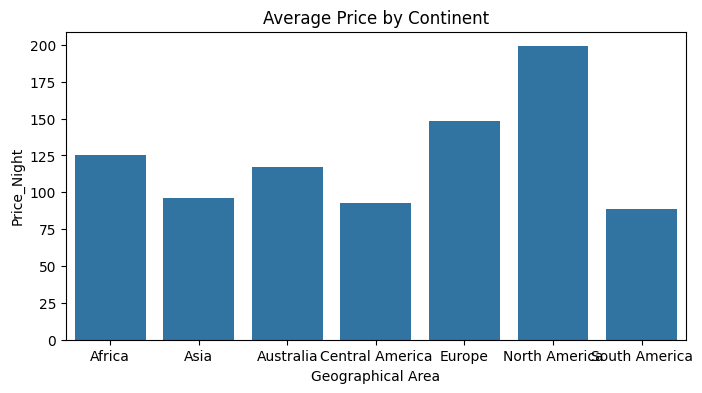

In [15]:
average_price_per_continent = df['Price_Night'].groupby(df['Geographical Area']).mean().reset_index()

plt.figure(figsize=(8, 4))
sns.barplot(x='Geographical Area', y='Price_Night', data=average_price_per_continent)
plt.title('Average Price by Continent')
plt.show()

Clearly, there are differences in the average price of the listing per each continent.

It might be worth considering one-hot-encoding for this new variable.

## Numerical Variables

In [16]:
df_numeric.describe()

,guests,beds,bathrooms,Price_Night,Cleanliness_rating,Accuracy_rating,Communication_rating,Location_rating,Check-in_rating,Value_rating,amenities_count,bedrooms
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,3.872891,2.392576,1.362205,152.536558,4.852306,4.903262,4.932058,4.903487,4.943307,4.764004,34.767154,1.637795
std,2.367820,1.824505,0.817441,127.170901,0.182999,0.135153,0.122274,0.121362,0.103555,0.181982,14.438702,1.058731
min,1.000000,1.000000,0.000000,8.000000,3.800000,4.000000,3.900000,4.000000,3.900000,3.300000,3.000000,1.000000
25%,2.000000,1.000000,1.000000,83.000000,4.800000,4.900000,4.900000,4.900000,4.900000,4.700000,24.000000,1.000000
50%,4.000000,2.000000,1.000000,119.000000,4.900000,4.900000,5.000000,4.900000,5.000000,4.800000,34.000000,1.000000
75%,4.000000,3.000000,1.500000,175.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.900000,44.000000,2.000000
max,16.000000,17.000000,10.000000,1132.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,84.000000,10.000000


/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


['ID', 'Category', 'Title', 'Description', 'Amenities', 'Location', 'url', 'Geographical Area']


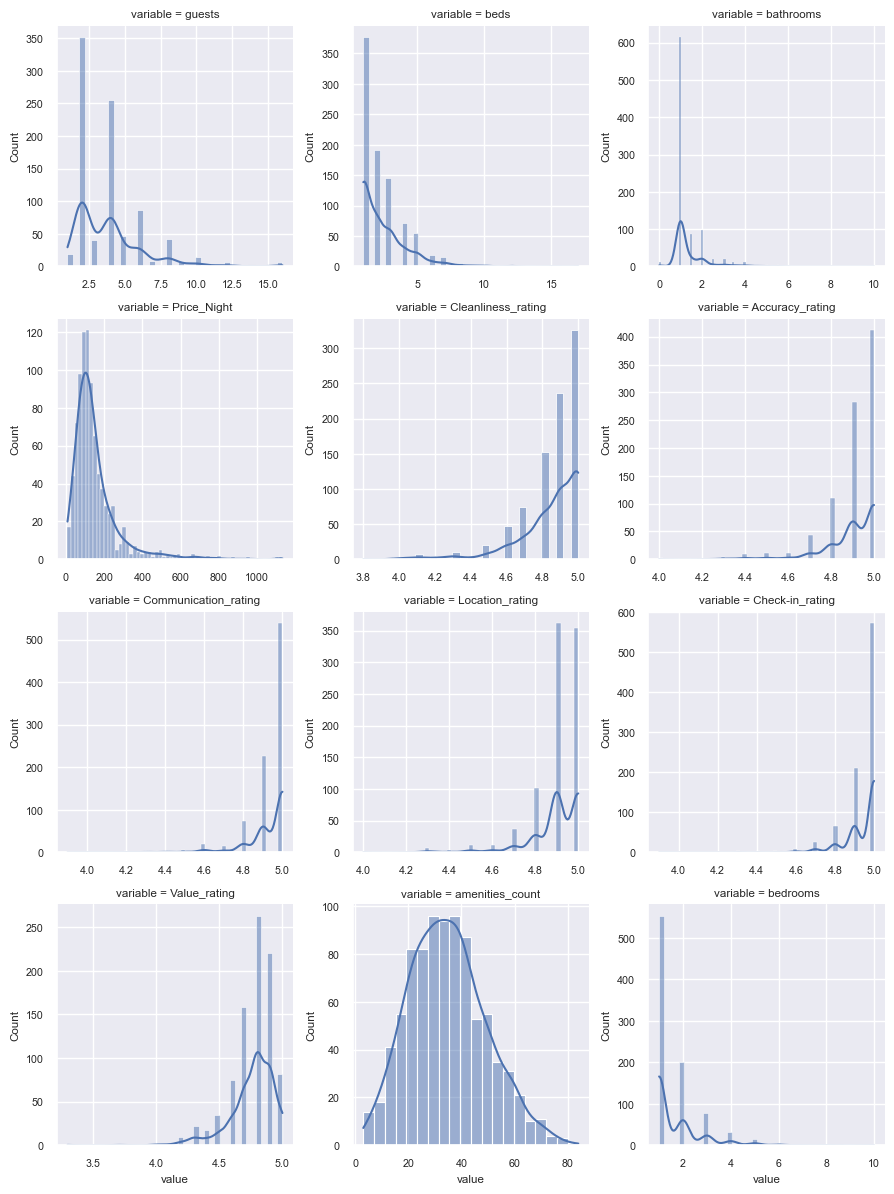

In [17]:
# Set numeric (ie. continuous or ordinal category) features:
numeric_features = ['guests',
                    'beds',
                    'bathrooms',
                    'Price_Night',
                    'Cleanliness_rating',
                    'Accuracy_rating',
                    'Communication_rating',
                    'Location_rating',
                    'Check-in_rating',
                    'Value_rating',
                    'amenities_count',
                    'bedrooms']

categorical_features = [col for col in df.columns if col not in numeric_features]
sns.set(font_scale=0.7)
f = pd.melt(df, value_vars=numeric_features)
g = sns.FacetGrid(f, col="variable",  col_wrap=3, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

print(categorical_features)

Price per night is skewed to the right, with some outliers.

<Axes: ylabel='Price_Night'>

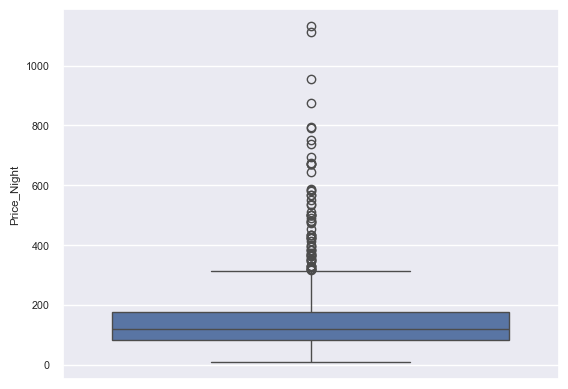

In [18]:
sns.boxplot(df["Price_Night"])

In the first place, we will consider reducing the skewness by log transforming the data, over removing the outliers.

If this is successful, we can avoid discarding data.

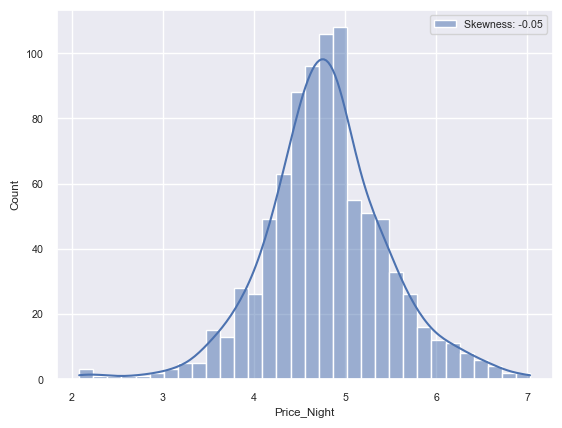

In [19]:
log_price_night = df["Price_Night"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_price_night,label="Skewness: %.2f"%(log_price_night.skew()), kde=True )
t.legend()

The log transform of the Price/night returns a variable which is normally distributed.

Moving on other variables whose distribution can be improved:

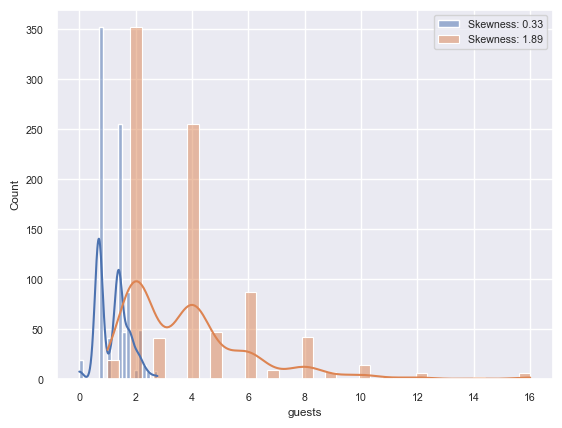

In [20]:
log_guests = df["guests"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_guests,label="Skewness: %.2f"%(log_guests.skew()), kde=True )
t.legend()
t=sns.histplot(df["guests"],label="Skewness: %.2f"%(df["guests"].skew()), kde=True)
t.legend()

Looks like a bimodal distribution due to the fact that most listings have 2 or 4 beds.

The distribution after log transform looks less skewed to the right, hence we will consider log transform.

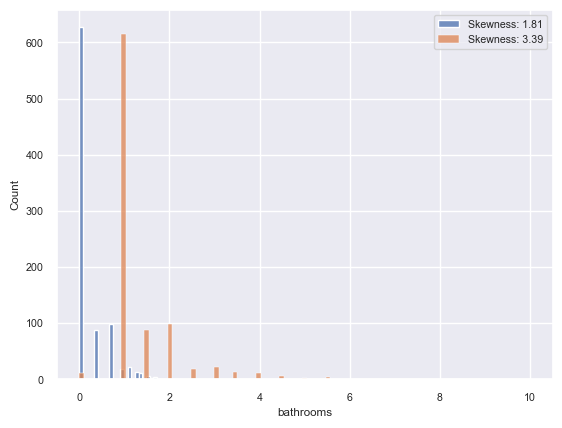

In [21]:
log_value = df["bathrooms"].map(lambda i: np.log(i) if i > 0 else 0)
t=sns.histplot(log_value,label="Skewness: %.2f"%(log_value.skew()) )
t.legend()
t=sns.histplot(df["bathrooms"],label="Skewness: %.2f"%(df["bathrooms"].skew()) )
t.legend()

Number of bathroom distribution is dominated by 1, hence log transform returns a distribution skewed to the right.

After trying a few power transforms, I could not find a strategy to improve value_rating. We will leave it for now.

## Variables collinearity
Let's check the degree of correlation between variables

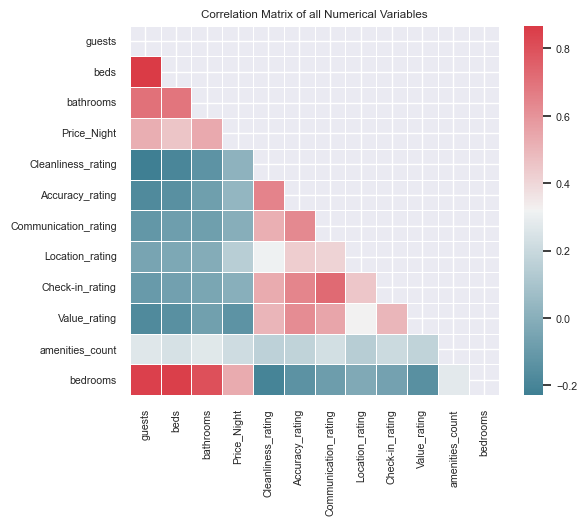

In [22]:
# calculate the Pearson coefficient of correlation for the numerical values
corr = df_numeric.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

# set thins up for plotting
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap
sns.heatmap(corr, mask=mask,
            square=True, linewidths=.5, annot=False, cmap=cmap)
plt.yticks(rotation=0)
plt.title('Correlation Matrix of all Numerical Variables')
plt.show()

The heatmap shows some variables show strong collinearity. This is to be expected and logical for variables like "bedrooms", "beds", "guests", "bathrooms" and the all relate to the size of the host structure.

For instance, we can see that price/night has a strong linear correlation with the number of guests, beds and bathrooms.

amenities_count seems to have very little correlation with most of the variables. It will probably do not add much value as a feature.



## Correlation between variables

/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


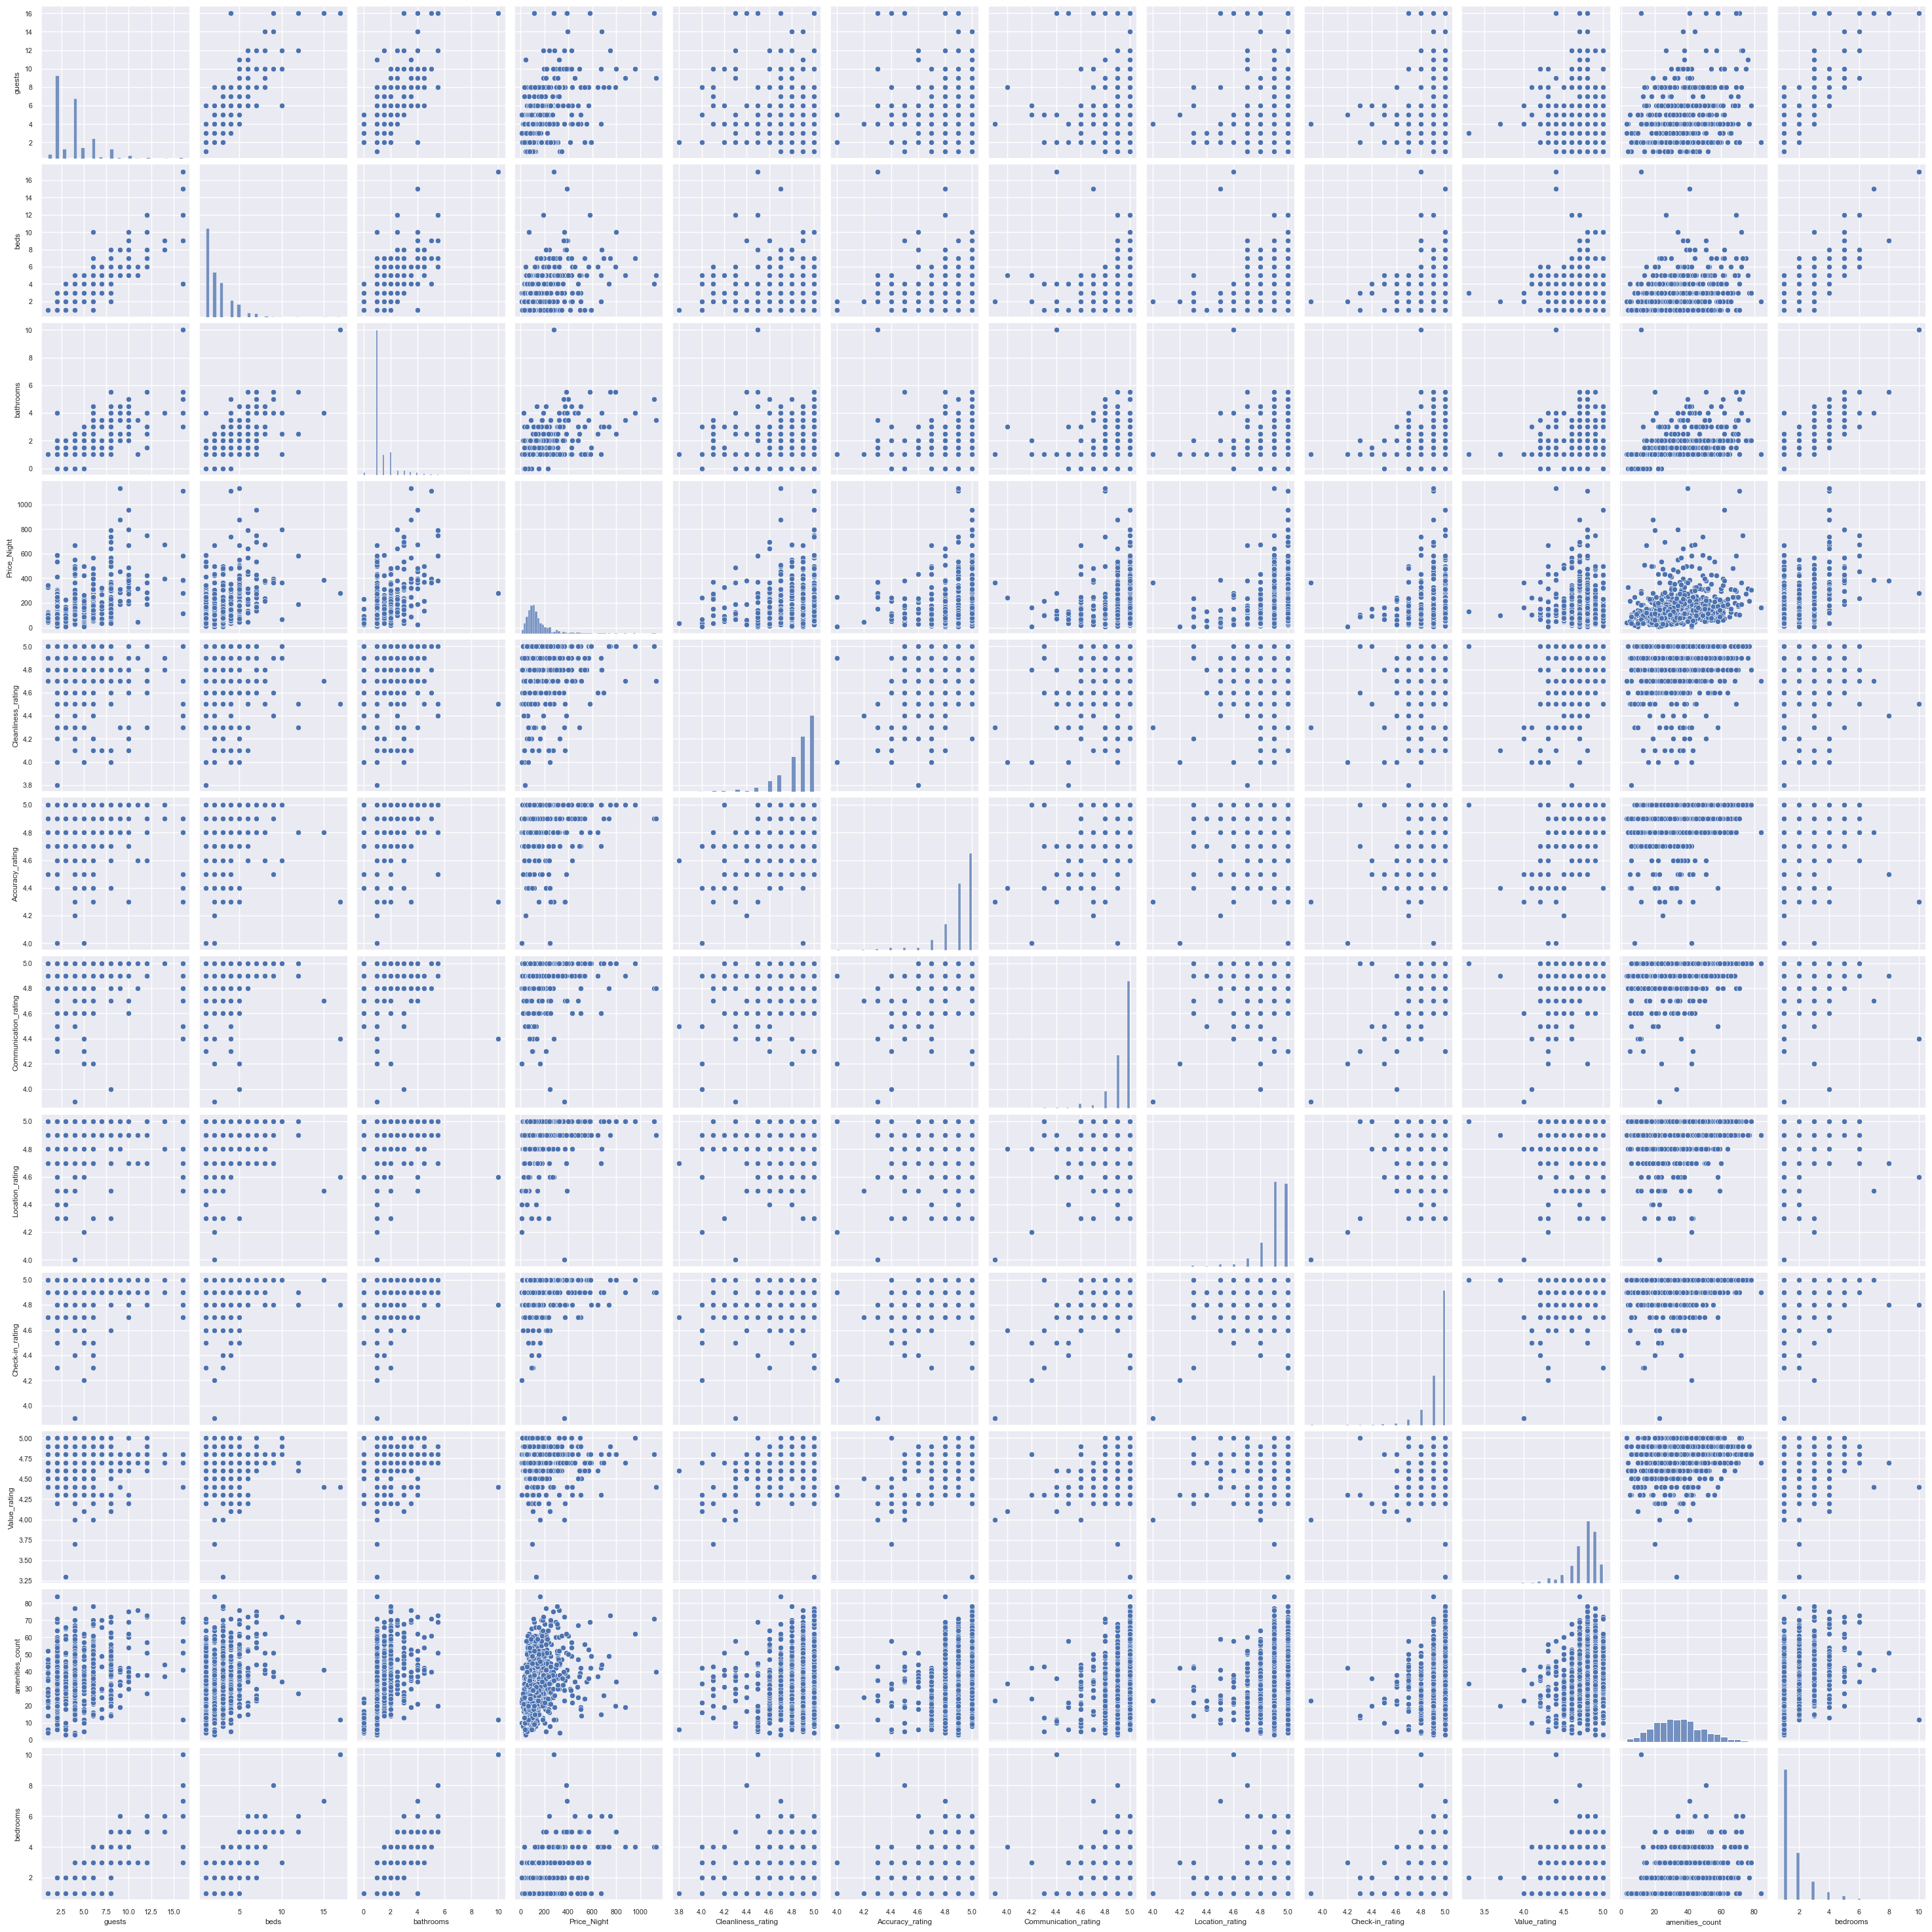

In [23]:
# Use Seaborn pairplot
sns.pairplot(df_numeric)

# Show the plot
plt.show()

/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


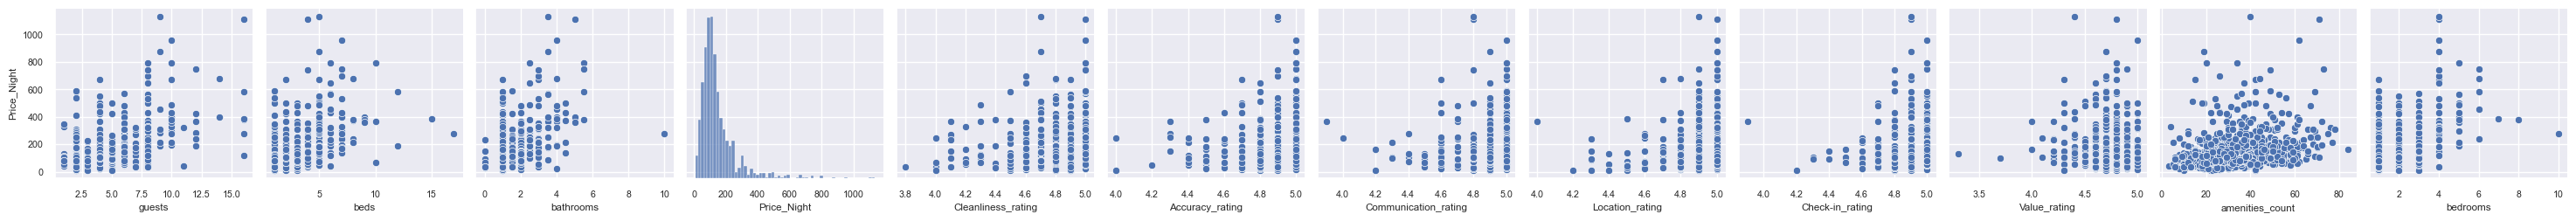

In [30]:
pp = sns.pairplot(data=df_numeric,
                  y_vars=['Price_Night'],
                  x_vars=df_numeric.columns.values)

/Users/saveriotufano/miniforge3/lib/python3.10/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


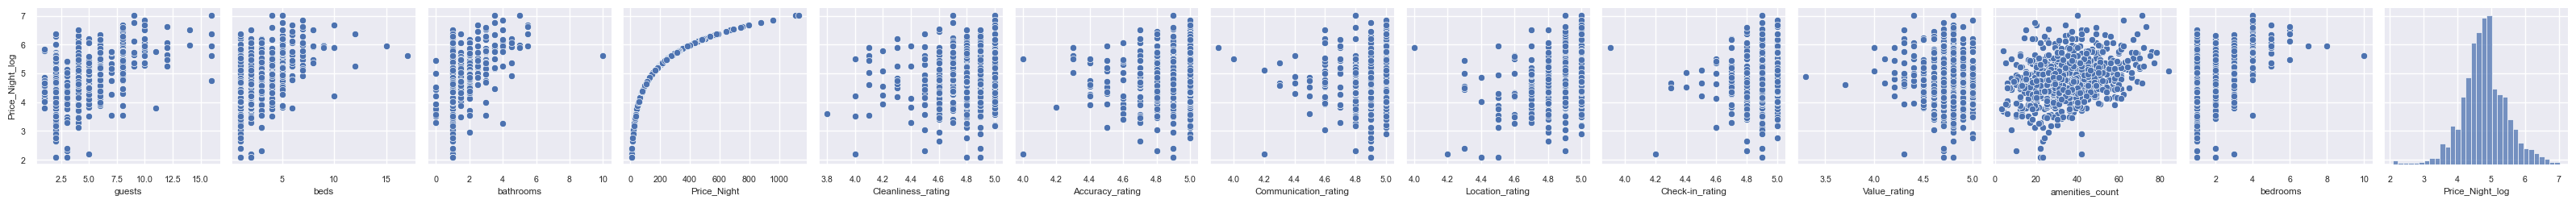

In [33]:
df_numeric['Price_Night_log'] = np.log(df_numeric['Price_Night'])
pp = sns.pairplot(data=df_numeric,
                  y_vars=['Price_Night_log'],
                  x_vars=df_numeric.columns.values)